In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, linregress, norm
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# import csv and clean emissions_df
emissions_df = pd.read_csv('Resources/co2_emissions_kt_by_country.csv')
emissions_df = emissions_df[['country_name', 'year', 'value']]
emissions_df.columns = ['Country', 'Year', 'CO2_Emissions']
emissions_df.head()

,Country,Year,CO2_Emissions
0,Aruba,1960,11092.675
1,Aruba,1961,11576.719
2,Aruba,1962,12713.489
3,Aruba,1963,12178.107
4,Aruba,1964,11840.743


In [3]:
# import csv and clean pesticide_df
pesticide_df = pd.read_csv('Resources/pesticide-use-tonnes.csv')
pesticide_df = pesticide_df[['Entity', 'Year', 'Pesticides (total) | 00001357 || Agricultural Use | 005157 || Tonnes']]
pesticide_df.columns = ['Country', 'Year', 'Pesticides_Used']
pesticide_df['Country'] = pesticide_df['Country'].str.replace(r"\s*\(.*\)", "", regex=True).str.strip()
pesticide_df.head()

,Country,Year,Pesticides_Used
0,Africa,1990,73958.66
1,Africa,1991,69956.26
2,Africa,1992,60260.71
3,Africa,1993,54301.62
4,Africa,1994,58819.04


In [4]:
# import and clean cc_impact_on_ag_df
cc_impact_on_ag_df = pd.read_csv('Resources/climate_change_impact_on_agriculture_2024.csv')
cc_impact_on_ag_df = cc_impact_on_ag_df[['Year', 'Country','Crop_Type', 'Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA']]
cc_impact_grouped = cc_impact_on_ag_df.groupby(['Country', 'Year', 'Crop_Type']).mean().reset_index()
cc_impact_grouped.columns = ['Country', 'Year', 'Crop_Type', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']
cc_impact_grouped['Country'] = cc_impact_grouped['Country'].replace('USA', 'United States')
cc_impact_grouped

,Country,Year,Crop_Type,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,Argentina,1990,Barley,2.152000,20.406667
1,Argentina,1990,Coffee,2.145333,17.013333
2,Argentina,1990,Corn,2.126333,39.413333
3,Argentina,1990,Cotton,1.597500,37.895000
4,Argentina,1990,Fruits,3.061500,18.950000
...,...,...,...,...,...
3286,United States,2024,Rice,1.203200,11.388000
3287,United States,2024,Soybeans,2.736667,20.090000
3288,United States,2024,Sugarcane,1.868500,19.982500
3289,United States,2024,Vegetables,2.254500,38.375000


In [5]:
# Merge dfs
merged_df = pd.merge(emissions_df, pesticide_df, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, cc_impact_grouped, on=['Country', 'Year'], how='inner')
merged_df

,Country,Year,CO2_Emissions,Pesticides_Used,Crop_Type,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,Argentina,1990,1.003200e+05,26156.0,Barley,2.152000,20.406667
1,Argentina,1990,1.003200e+05,26156.0,Coffee,2.145333,17.013333
2,Argentina,1990,1.003200e+05,26156.0,Corn,2.126333,39.413333
3,Argentina,1990,1.003200e+05,26156.0,Cotton,1.597500,37.895000
4,Argentina,1990,1.003200e+05,26156.0,Fruits,3.061500,18.950000
...,...,...,...,...,...,...,...
2809,United States,2019,4.817720e+06,457385.4,Rice,2.098000,29.460000
2810,United States,2019,4.817720e+06,457385.4,Soybeans,2.412500,11.975000
2811,United States,2019,4.817720e+06,457385.4,Sugarcane,1.304667,13.570000
2812,United States,2019,4.817720e+06,457385.4,Vegetables,2.243333,19.736667


In [6]:
usa_df = merged_df[merged_df['Country'] == 'United States']
usa_df = usa_df.reset_index(drop=True)
usa_df

,Country,Year,CO2_Emissions,Pesticides_Used,Crop_Type,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,United States,1990,4.844520e+06,400975.94,Barley,2.245000,28.356667
1,United States,1990,4.844520e+06,400975.94,Coffee,2.276000,6.660000
2,United States,1990,4.844520e+06,400975.94,Fruits,3.310000,13.813333
3,United States,1990,4.844520e+06,400975.94,Rice,2.016000,47.870000
4,United States,1990,4.844520e+06,400975.94,Soybeans,2.265000,21.535000
...,...,...,...,...,...,...,...
273,United States,2019,4.817720e+06,457385.40,Rice,2.098000,29.460000
274,United States,2019,4.817720e+06,457385.40,Soybeans,2.412500,11.975000
275,United States,2019,4.817720e+06,457385.40,Sugarcane,1.304667,13.570000
276,United States,2019,4.817720e+06,457385.40,Vegetables,2.243333,19.736667


In [7]:
crops = usa_df['Crop_Type'].unique().tolist()
crops

['Barley',
 'Coffee',
 'Fruits',
 'Rice',
 'Soybeans',
 'Sugarcane',
 'Vegetables',
 'Wheat',
 'Corn',
 'Cotton']

In [8]:
def plot_correlation_multiple(df, crop_types, x_label, y_label):

    # Filter the DataFrame for the specific country, region, and multiple crop types
    filtered_df = df[df['Crop_Type'].isin(crop_types)]
    
    # Create scatter plot for each crop type
    plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
    for crop_type in crop_types:
        crop_df = filtered_df[filtered_df['Crop_Type'] == crop_type]
        x = crop_df[x_label]
        y = crop_df[y_label]
        
        # Check if x and y have enough data points
        if len(x) < 2 or len(y) < 2:
            print(f"Not enough data points to perform correlation analysis for {crop_type}.")
            continue
        
        # Perform linear regression
        slope, intercept, r, p, std_err = linregress(x, y)
        line = slope * x + intercept
        
        # Scatter plot for this crop type
        plt.scatter(x, y, label=crop_type)
        plt.plot(x, line, "--", label=f"{crop_type} regression")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label}")
    plt.legend()  # Show legend to differentiate crop types
    plt.xticks(rotation=45)
    plt.show()

    # Print correlation coefficient for each crop type
    for crop_type in crop_types:
        crop_df = filtered_df[filtered_df['Crop_Type'] == crop_type]
        x = crop_df[x_label]
        y = crop_df[y_label]
        if len(x) < 2 or len(y) < 2:
            continue
        correlation_coefficient = round(pearsonr(x, y)[0], 2)
        print(f"The correlation coefficient between {x_label} and {y_label} for {crop_type} is {correlation_coefficient}")


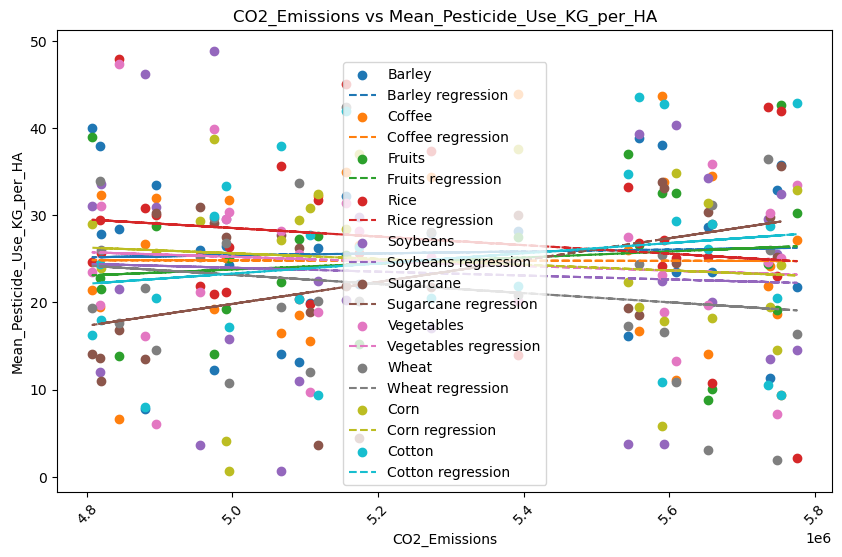

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA for Barley is 0.04
The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA for Coffee is -0.0
The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA for Fruits is 0.14
The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA for Rice is -0.17
The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA for Soybeans is -0.06
The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA for Sugarcane is 0.48
The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA for Vegetables is -0.1
The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA for Wheat is -0.19
The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA for Corn is -0.11
The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_K

In [9]:
# List of crop types to combine in the same scatter plot
crops = ['Barley', 'Coffee', 'Fruits', 'Rice', 'Soybeans', 'Sugarcane', 'Vegetables', 'Wheat', 'Corn', 'Cotton']

# Call the modified function
plot_correlation_multiple(usa_df, crops, 'CO2_Emissions', 'Mean_Pesticide_Use_KG_per_HA')

In [10]:
def plot_correlation(df, crop_type, x_label, y_label):
    
    # Filter the DataFrame for the specific country and crop type
    filtered_df = df[df['Crop_Type'] == crop_type]

    # Get x and y data
    x = filtered_df[x_label]
    y = filtered_df[y_label]

    # Check if x and y have enough data points
    if len(x) < 2 or len(y) < 2:
        print("Not enough data points to perform correlation analysis.")
        return

    # Perform linear regression
    slope, intercept, r, p, std_err = linregress(x, y)
    line = slope * x + intercept

    # Create the scatter plot
    plt.scatter(x, y)
    plt.plot(x, line, "--", color='red')  # Use red dashed line for the regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label}")
    plt.show()

    # Print the Pearson correlation coefficient
    correlation_coefficient = round(pearsonr(x, y)[0], 2)
    print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")


Sugarcane: 


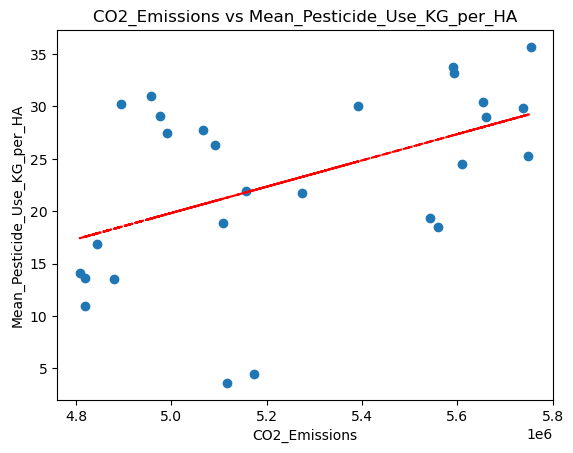

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is 0.48

Wheat: 


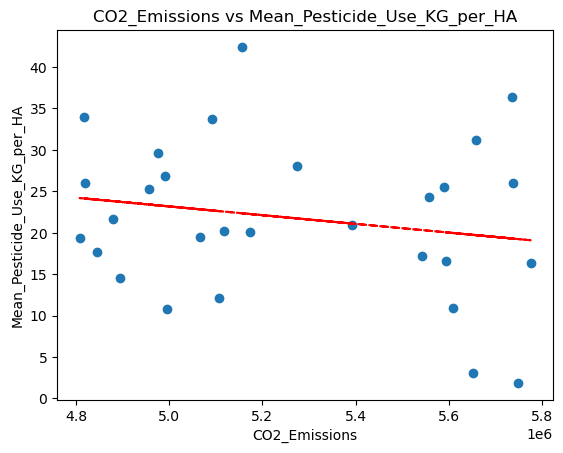

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is -0.19

Fruits: 


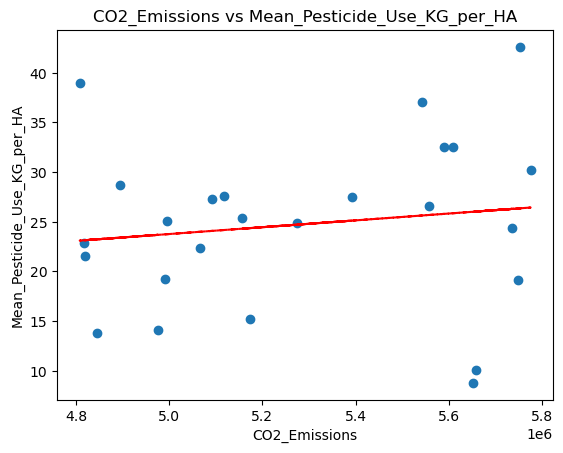

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is 0.14


In [11]:
# List to iterate over
crop_types = ['Sugarcane', 'Wheat', 'Fruits'] 

# Loop through each crop type and call the function
for crop_type in crop_types:
    print(f"\n{crop_type}: ")
    plot_correlation(usa_df, crop_type, 'CO2_Emissions', 'Mean_Pesticide_Use_KG_per_HA')


Sugarcane: 


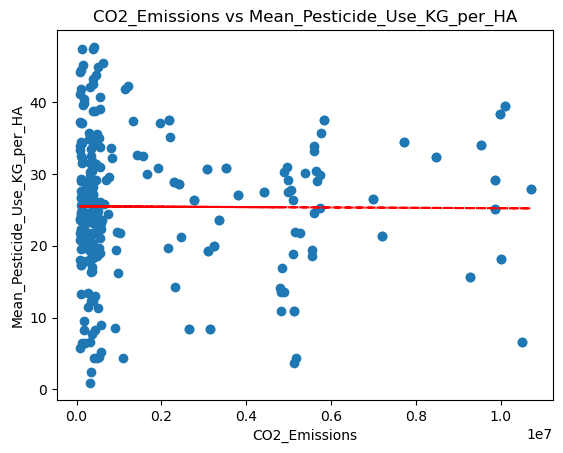

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is -0.01

Wheat: 


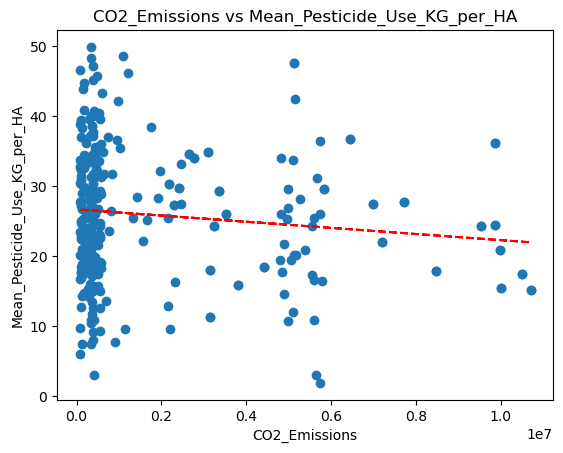

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is -0.13

Fruits: 


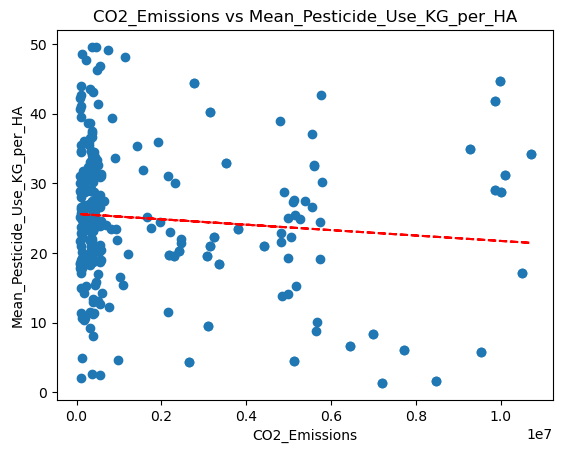

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is -0.11


In [13]:
# List to iterate over
crop_types = ['Sugarcane', 'Wheat', 'Fruits'] 

# Loop through each crop type and call the function
for crop_type in crop_types:
    print(f"\n{crop_type}: ")
    plot_correlation(merged_df, crop_type, 'CO2_Emissions', 'Mean_Pesticide_Use_KG_per_HA')